In [ ]:
# colab에서 실행시킬것.

In [69]:
s=[4,5,6,8,9,10,11,13]
print(s)
print(np.quantile(s,0.25))
print(np.quantile(s,0.5))
print(np.quantile(s,0.75))

[4, 5, 6, 8, 9, 10, 11, 13]
5.75
8.5
10.25


In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('accalldata.csv')

In [ ]:
!pip install catboost

In [ ]:
train=data.iloc[:,np.r_[1,2,3,4,5,6,7,8,9,10,-1,-5]]
## 1 : 차대사람 2 : 차대차 3 : 차량단독
## 1 : 주간 2 : 야간
train.head()

,월,일,시간,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),주야구분,요일,지역,사고유형대분류
0,1,28,13,1.0,22.2,1.7,0.0,18.9,1,7,구의동,1
1,2,3,5,-12.9,78.6,1.3,0.0,66.7,2,6,광장동,3
2,2,9,15,0.1,322.1,3.0,0.0,45.7,1,5,자양동,2
3,2,13,11,4.0,122.8,1.0,0.0,29.5,1,2,중곡동,2
4,4,18,18,21.0,301.6,1.7,0.0,29.5,2,4,군자동,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

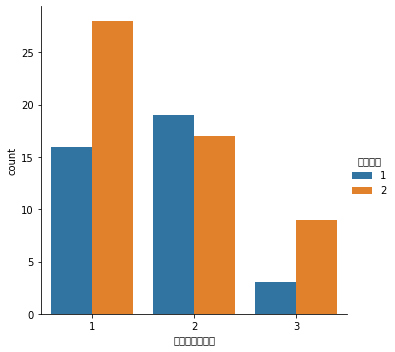

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(data=train,x='사고유형대분류',hue='주야구분',kind='count')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_te

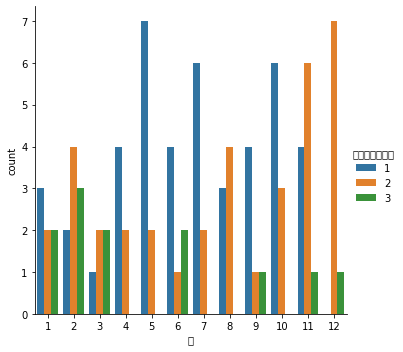

In [ ]:
sns.catplot(data=train,x='월',hue='사고유형대분류',kind='count')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train['지역']=le.fit_transform(train['지역'])
train['지역']+=1
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,월,일,시간,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),주야구분,요일,지역,사고유형대분류
0,1,28,13,1.0,22.2,1.7,0.0,18.9,1,7,2,1
1,2,3,5,-12.9,78.6,1.3,0.0,66.7,2,6,1,3
2,2,9,15,0.1,322.1,3.0,0.0,45.7,1,5,8,2
3,2,13,11,4.0,122.8,1.0,0.0,29.5,1,2,10,2
4,4,18,18,21.0,301.6,1.7,0.0,29.5,2,4,3,1


In [ ]:
from catboost import Pool, CatBoostClassifier

cat_features=list([0,1,2,8,9,10])

train_pool=Pool(data=train.iloc[:,:-1],label=train.iloc[:,-1],cat_features=cat_features)

model=CatBoostClassifier(objective='MultiClass',n_estimators=1000,random_state=71)

In [ ]:
model.fit(train_pool,plot=True,use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.070061
0:	learn: 1.0833258	total: 14.8ms	remaining: 14.7s
1:	learn: 1.0679527	total: 23.6ms	remaining: 11.8s
2:	learn: 1.0579643	total: 24.6ms	remaining: 8.16s
3:	learn: 1.0472035	total: 33.9ms	remaining: 8.43s
4:	learn: 1.0370735	total: 41ms	remaining: 8.16s
5:	learn: 1.0284054	total: 41.5ms	remaining: 6.87s
6:	learn: 1.0155967	total: 48.7ms	remaining: 6.91s
7:	learn: 1.0074027	total: 55.7ms	remaining: 6.91s
8:	learn: 1.0004404	total: 56.1ms	remaining: 6.18s
9:	learn: 0.9906214	total: 62.1ms	remaining: 6.15s
10:	learn: 0.9842192	total: 71.4ms	remaining: 6.42s
11:	learn: 0.9754103	total: 82.9ms	remaining: 6.83s
12:	learn: 0.9673041	total: 87.3ms	remaining: 6.63s
13:	learn: 0.9524474	total: 94.3ms	remaining: 6.64s
14:	learn: 0.9429733	total: 102ms	remaining: 6.68s
15:	learn: 0.9339936	total: 106ms	remaining: 6.51s
16:	learn: 0.9290778	total: 107ms	remaining: 6.19s
17:	learn: 0.9174014	total: 114ms	remaining: 6.21s
18:	learn: 0.9036744	total: 121ms	remaining: 6.26s

In [ ]:
train.head()

,월,일,시간,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),주야구분,요일,지역,사고유형대분류
0,1,28,13,1.0,22.2,1.7,0.0,18.9,1,7,2,1
1,2,3,5,-12.9,78.6,1.3,0.0,66.7,2,6,1,3
2,2,9,15,0.1,322.1,3.0,0.0,45.7,1,5,8,2
3,2,13,11,4.0,122.8,1.0,0.0,29.5,1,2,10,2
4,4,18,18,21.0,301.6,1.7,0.0,29.5,2,4,3,1


In [ ]:
model.predict_proba([[10,13,13,-12.9,78.6,1.7,0.0,66.7,1,4,3]])

array([[0.5045638 , 0.31117692, 0.18425928]])

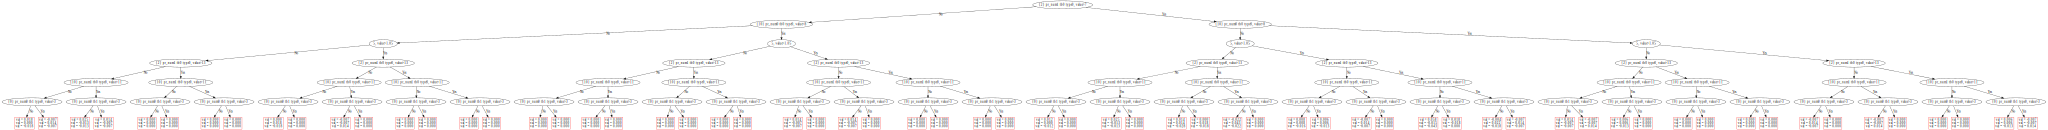

In [ ]:
model.plot_tree(tree_idx=0, pool=None)